In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# 2D Poisson Problem

We solve the following problem:

\begin{equation}
\frac{\partial u^2}{\partial^2 x} + \frac{\partial u^2}{\partial^2 y} = -8\pi^2\cos{(2\pi x)}\cos{(2\pi y)}
\end{equation}

with boundary conditions:

\begin{equation}
\left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.\frac{\partial u}{\partial x}\right|_{x=1}=\left.\frac{\partial u}{\partial y}\right|_{y=0}=\left.\frac{\partial u}{\partial y}\right|_{y=1}=0
\end{equation}

The exact solution is

\begin{equation}
u(x, y) = \cos{(2\pi x)}\cos{(2\pi y)}
\end{equation}

## Test set 1:

Number of GPU: 1 (K40)  
Machine: Theo

<font color='red'>Top solver: </font>

1. <font color='red'>Preconditioned CG (PCG)</font>
2. <font color='red'>Flexible Preconditioned CG (PCGF)</font>
3. <font color='red'>Preconditioned Stable BiCG (PBICGSTAB)</font>

Tolerance: absolute residual reach $10^{-12}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: Block Jacobi  
Cycle: V  
Pre-sweep: 1  
Post-Sweep: 1  
Coarsest sweep: 1  
Maximum size of coarsest grid: 100  
<font color='red'>Relaxation factor of the block Jacobi: from 0.1 to 1  </font>

Grid size: 3750 $\times$ 3750

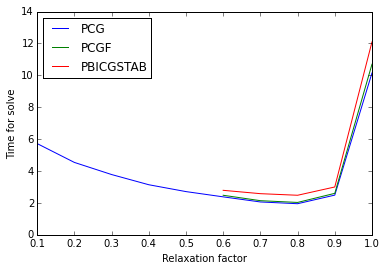

In [2]:
omg=numpy.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
tPCG = numpy.array([5.72, 4.54, 3.78, 3.14, 2.71, 2.38, 2.06, 1.95, 2.49, 10.15])
tPCGF = numpy.array([2.48, 2.14, 2.03, 2.6, 10.7])
tPBICGSTAB = numpy.array([2.79, 2.58, 2.48, 3, 12.1])

pyplot.plot(omg, tPCG, label="PCG")
pyplot.plot(omg[5:], tPCGF, label="PCGF")
pyplot.plot(omg[5:], tPBICGSTAB, label="PBICGSTAB")
pyplot.xlabel("Relaxation factor")
pyplot.ylabel("Time for solve")
pyplot.legend(loc=0);

## Test set 2:

<font color='red'>Number of GPU: 12, 24 (K20)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach $10^{-10}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: Block Jacobi  
<font color='red'>Cycle: V, W, F</font>  
Pre-sweep: 1  
Post-Sweep: 1  
<font color='red'>Coarsest sweep: 1, 2, 3</font>  
Maximum size of coarsest grid: 10  
Relaxation factor of the block Jacobi: 0.8

Grid size: 9000 $\times$ 9000 (matrix size: 81M $\times$ 81M)

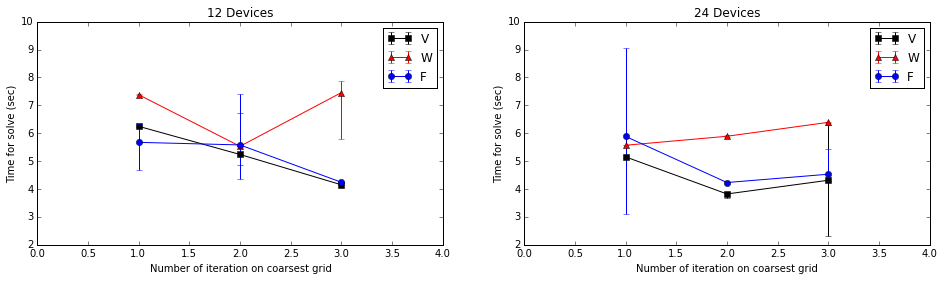

In [3]:
cycle = ["V", "W", "F"]
sweep = numpy.array([1, 2, 3])

time24 = {"V": numpy.array([5.152, 3.822, 4.314]),
        "W": numpy.array([5.568, 5.89, 6.39]),
        "F": numpy.array([5.886, 4.232, 4.53])}
errL24 = {"V": numpy.array([0.052, 0.152, 2.004]),
        "W": numpy.array([0.008, 0.03, 0.01]),
        "F": numpy.array([2.766, 0.002, 0.23])}
errU24 = {"V": numpy.array([0.018, 0.078, 1.986]),
        "W": numpy.array([0.012, 0.04, 0.02]),
        "F": numpy.array([3.174, 0.008, 0.89])}
err24 = {cyc: numpy.array(numpy.vstack((errL24[cyc], errU24[cyc]))) for cyc in cycle}

time12 = {"V": numpy.array([6.248, 5.238, 4.15]),
        "W": numpy.array([7.382, 5.53, 7.456]),
        "F": numpy.array([5.672, 5.58, 4.24])}
errL12 = {"V": numpy.array([0.008, 0.368, 0]),
        "W": numpy.array([0.002, 0, 1.656]),
        "F": numpy.array([0.992, 1.22, 0])}
errU12 = {"V": numpy.array([0.002, 1.472, 0]),
        "W": numpy.array([0.008, 0, 0.424]),
        "F": numpy.array([0.658, 1.83, 0])}
err12 = {cyc: numpy.array(numpy.vstack((errL12[cyc], errU12[cyc]))) for cyc in cycle}

pyplot.figure(figsize=(16, 4))
pyplot.subplot(1, 2, 1)
pyplot.title("12 Devices")
pyplot.errorbar(sweep, time12["V"], yerr = err12["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time12["W"], yerr = err12["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time12["F"], yerr = err12["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)
pyplot.subplot(1, 2, 2)
pyplot.title("24 Devices")
pyplot.errorbar(sweep, time24["V"], yerr = err24["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time24["W"], yerr = err24["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time24["F"], yerr = err24["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)

## Test set 3:

<font color='red'>Number of GPU: 12, 24 (K20)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach <font color='red'>$10^{-8}$</font>  

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: Block Jacobi  
<font color='red'>Cycle: V, W, F</font>  
Pre-sweep: 1  
Post-Sweep: 1  
<font color='red'>Coarsest sweep: 1, 2, 3</font>  
Maximum size of coarsest grid: 10  
Relaxation factor of the block Jacobi: 0.8

Grid size: 9000 $\times$ 9000 (matrix size: 81M $\times$ 81M)

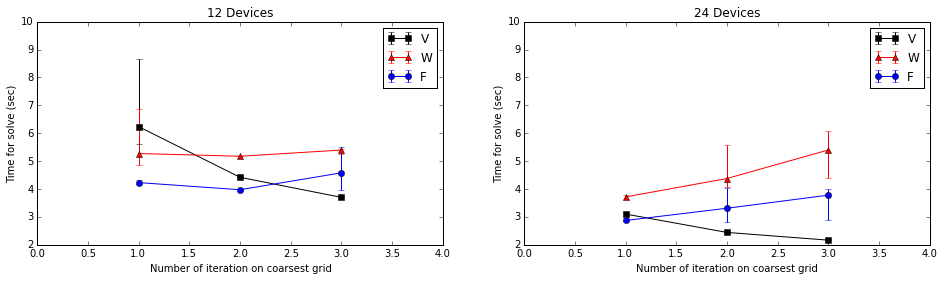

In [4]:
cycle = ["V", "W", "F"]
sweep = numpy.array([1, 2, 3])

time24 = {"V": numpy.array([3.102, 2.444, 2.166]),
          "W": numpy.array([3.716, 4.376, 5.4]),
          "F": numpy.array([2.872, 3.31, 3.78])}
errL24 = {"V": numpy.array([0.032, 0.044, 0.006]),
          "W": numpy.array([0.066, 0.316, 0.99]),
          "F": numpy.array([0.012, 0.49, 0.88])}
errU24 = {"V": numpy.array([0.058, 0.016, 0.004]),
          "W": numpy.array([0.074, 1.214, 0.67]),
          "F": numpy.array([0.008, 0.74, 0.23])}
err24 = {cyc: numpy.array(numpy.vstack((errL24[cyc], errU24[cyc]))) for cyc in cycle}

time12 = {"V": numpy.array([6.238, 4.42, 3.7]),
          "W": numpy.array([5.272, 5.174, 5.396]),
          "F": numpy.array([4.23, 3.974, 4.58])}
errL12 = {"V": numpy.array([0.608, 0, 0]),
          "W": numpy.array([0.402, 0.004, 0.156]),
          "F": numpy.array([0.05, 0.004, 0.61])}
errU12 = {"V": numpy.array([2.422, 0, 0]),
          "W": numpy.array([1.608, 0.006, 0.044]),
          "F": numpy.array([0.08, 0.016, 0.92])}
err12 = {cyc: numpy.array(numpy.vstack((errL12[cyc], errU12[cyc]))) for cyc in cycle}

pyplot.figure(figsize=(16, 4))
pyplot.subplot(1, 2, 1)
pyplot.title("12 Devices")
pyplot.errorbar(sweep, time12["V"], yerr = err12["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time12["W"], yerr = err12["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time12["F"], yerr = err12["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)
pyplot.subplot(1, 2, 2)
pyplot.title("24 Devices")
pyplot.errorbar(sweep, time24["V"], yerr = err24["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time24["W"], yerr = err24["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time24["F"], yerr = err24["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)

## Test set 4:

<font color='red'>Number of GPU: 12, 24 (K20)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach $10^{-8}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: <font color='red'>ALL</font>  

Smoother: Block Jocabi  
Coarsest solver: Block Jacobi  
<font color='red'>Cycle: V, W, F</font>  
Pre-sweep: 1  
Post-Sweep: 1  
<font color='red'>Coarsest sweep: 1, 2, 3</font>  
Maximum size of coarsest grid: 10  
Relaxation factor of the block Jacobi: 0.8

Grid size: 9000 $\times$ 9000 (matrix size: 81M $\times$ 81M)

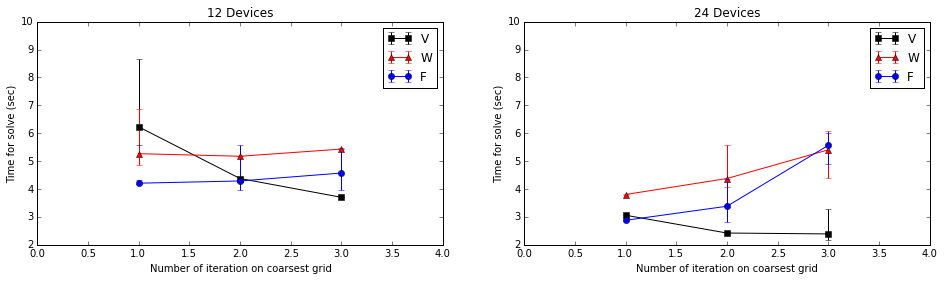

In [5]:
cycle = ["V", "W", "F"]
sweep = numpy.array([1, 2, 3])

time24 = {"V": numpy.array([3.06, 2.422, 2.39]),
          "W": numpy.array([3.802, 4.376, 5.406]),
          "F": numpy.array([2.878, 3.382, 5.568])}
errL24 = {"V": numpy.array([0.05, 0.022, 0.23]),
          "W": numpy.array([0.002, 0.306, 1.006]),
          "F": numpy.array([0.008, 0.552, 0.668])}
errU24 = {"V": numpy.array([0.02, 0.038, 0.91]),
          "W": numpy.array([0.008, 1.214, 0.674]),
          "F": numpy.array([0.012, 0.988, 0.452])}
err24 = {cyc: numpy.array(numpy.vstack((errL24[cyc], errU24[cyc]))) for cyc in cycle}

time12 = {"V": numpy.array([6.23, 4.376, 3.702]),
          "W": numpy.array([5.266, 5.174, 5.43]),
          "F": numpy.array([4.208, 4.288, 4.572])}
errL12 = {"V": numpy.array([0.65, 0.126, 0.002]),
          "W": numpy.array([0.406, 0.004, 0.01]),
          "F": numpy.array([0.028, 0.318, 0.602])}
errU12 = {"V": numpy.array([2.42, 0.044, 0.008]),
          "W": numpy.array([1.614, 0.006, 0.01]),
          "F": numpy.array([0.112, 1.272, 0.908])}
err12 = {cyc: numpy.array(numpy.vstack((errL12[cyc], errU12[cyc]))) for cyc in cycle}

pyplot.figure(figsize=(16, 4))
pyplot.subplot(1, 2, 1)
pyplot.title("12 Devices")
pyplot.errorbar(sweep, time12["V"], yerr = err12["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time12["W"], yerr = err12["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time12["F"], yerr = err12["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)
pyplot.subplot(1, 2, 2)
pyplot.title("24 Devices")
pyplot.errorbar(sweep, time24["V"], yerr = err24["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time24["W"], yerr = err24["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time24["F"], yerr = err24["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)

## Test set 5:

<font color='red'>Number of GPU: 12, 24 (K20)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach $10^{-10}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: <font color='red'>LU Decomposition</font>  
<font color='red'>Cycle: V, W, F</font>  
Pre-sweep: 1  
Post-Sweep: 1  
<font color='red'>Coarsest sweep: 1, 2, 3</font>  
Maximum size of coarsest grid: 10  
Relaxation factor of the block Jacobi: 0.8

Grid size: 9000 $\times$ 9000 (matrix size: 81M $\times$ 81M)

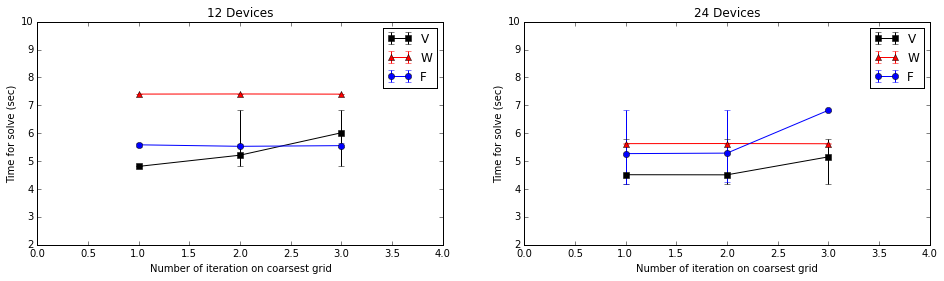

In [6]:
cycle = ["V", "W", "F"]
sweep = numpy.array([1, 2, 3])

time24 = {"V": numpy.array([4.512, 4.508, 5.152]),
          "W": numpy.array([5.626, 5.63, 5.622]),
          "F": numpy.array([5.268, 5.286, 6.822])}
errL24 = {"V": numpy.array([0.332, 0.338, 0.962]),
          "W": numpy.array([0.026, 0.02, 0.022]),
          "F": numpy.array([1.088, 1.026, 0.012])}
errU24 = {"V": numpy.array([1.278, 1.292, 0.638]),
          "W": numpy.array([0.034, 0.02, 0.028]),
          "F": numpy.array([1.562, 1.534, 0.008])}
err24 = {cyc: numpy.array(numpy.vstack((errL24[cyc], errU24[cyc]))) for cyc in cycle}

time12 = {"V": numpy.array([4.81, 5.212, 6.016]),
          "W": numpy.array([7.402, 7.406, 7.4]),
          "F": numpy.array([5.584, 5.53, 5.554])}
errL12 = {"V": numpy.array([0, 0.402, 1.206]),
          "W": numpy.array([0.002, 0.006, 0]),
          "F": numpy.array([0.084, 0.03, 0.054])}
errU12 = {"V": numpy.array([0, 1.608, 0.804]),
          "W": numpy.array([0.008, 0.014, 0]),
          "F": numpy.array([0.056, 0.1, 0.086])}
err12 = {cyc: numpy.array(numpy.vstack((errL12[cyc], errU12[cyc]))) for cyc in cycle}

pyplot.figure(figsize=(16, 4))
pyplot.subplot(1, 2, 1)
pyplot.title("12 Devices")
pyplot.errorbar(sweep, time12["V"], yerr = err12["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time12["W"], yerr = err12["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time12["F"], yerr = err12["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)
pyplot.subplot(1, 2, 2)
pyplot.title("24 Devices")
pyplot.errorbar(sweep, time24["V"], yerr = err24["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time24["W"], yerr = err24["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time24["F"], yerr = err24["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 4)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(2, 10)
pyplot.legend(loc=0)

## Test set 6:

<font color='red'>Number of GPU: 12, 24 (K20)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach $10^{-8}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: <font color='red'>Gauss-Seidel</font>  
<font color='red'>Cycle: V, W, F</font>  
Pre-sweep: 1  
Post-Sweep: 1  
<font color='red'>Coarsest sweep: 1, 2, 3, 4, 5</font>  
Maximum size of coarsest grid: 10  
Relaxation factor of the block Jacobi: 0.8

Grid size: 9000 $\times$ 9000 (matrix size: 81M $\times$ 81M)

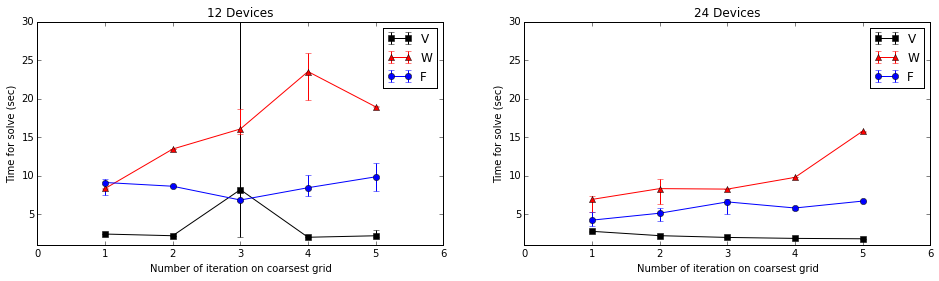

In [7]:
cycle = ["V", "W", "F"]
sweep = numpy.array([1, 2, 3, 4, 5])

time24 = {"V": numpy.array([2.75, 2.186, 1.958, 1.832, 1.782]),
          "W": numpy.array([6.9, 8.3, 8.236, 9.762, 15.764]),
          "F": numpy.array([4.204, 5.106, 6.574, 5.782, 6.68])}
errL24 = {"V": numpy.array([0.06, 0.066, 0.058, 0.002, 0.002]),
          "W": numpy.array([1.61, 1.95, 0.016, 0.012, 0.064]),
          "F": numpy.array([0.774, 1.066, 1.554, 0.272, 0.04])}
errU24 = {"V": numpy.array([0.04, 0.044, 0.042, 0.008, 0.008]),
          "W": numpy.array([0.41, 1.27, 0.014, 0.038, 0.076]),
          "F": numpy.array([1.046, 0.704, 0.426, 0.078, 0.02])}
err24 = {cyc: numpy.array(numpy.vstack((errL24[cyc], errU24[cyc]))) for cyc in cycle}

time12 = {"V": numpy.array([2.396, 2.18, 8.164, 1.98, 2.174]),
          "W": numpy.array([8.316, 13.444, 16.048, 23.508, 18.928]),
          "F": numpy.array([9.094, 8.608, 6.818, 8.416, 9.832])}
errL12 = {"V": numpy.array([0.006, 0, 6.134, 0, 0.174]),
          "W": numpy.array([0.006, 0.044, 0.658, 3.685, 0.048]),
          "F": numpy.array([1.624, 0.018, 0.128, 1.126, 1.832])}
errU12 = {"V": numpy.array([0.004, 0, 24.486, 0, 0.696]),
          "W": numpy.array([0.014, 0.056, 2.532, 2.462, 0.062]),
          "F": numpy.array([0.416, 0.012, 0.042, 1.674, 1.838])}
err12 = {cyc: numpy.array(numpy.vstack((errL12[cyc], errU12[cyc]))) for cyc in cycle}

pyplot.figure(figsize=(16, 4))
pyplot.subplot(1, 2, 1)
pyplot.title("12 Devices")
pyplot.errorbar(sweep, time12["V"], yerr = err12["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time12["W"], yerr = err12["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time12["F"], yerr = err12["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 6)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(1, 30)
pyplot.legend(loc=0)
pyplot.subplot(1, 2, 2)
pyplot.title("24 Devices")
pyplot.errorbar(sweep, time24["V"], yerr = err24["V"], fmt='ks-', label="V")
pyplot.errorbar(sweep, time24["W"], yerr = err24["W"], fmt='r^-', label="W")
pyplot.errorbar(sweep, time24["F"], yerr = err24["F"], fmt='bo-', label="F")
pyplot.xlabel("Number of iteration on coarsest grid")
pyplot.xlim(0, 6)
pyplot.ylabel("Time for solve (sec)")
pyplot.ylim(1, 30)
pyplot.legend(loc=0)

# 3D Poisson Problem

## Weak Scaling Test

<font color='red'>Number of GPU: 1, 2, 4, 8 (K20m)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach $10^{-8}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: Gauss-Seidel
Cycle: V  
Pre-sweep: 1  
Post-Sweep: 1  
Coarsest sweep: 4
Maximum size of coarsest grid: 2  
Relaxation factor of the block Jacobi: 0.8  

<font color='red'>Grid size: 10x10x10, 20x20x20, 40x40x40, 80x80x80, 160x160x160</font>

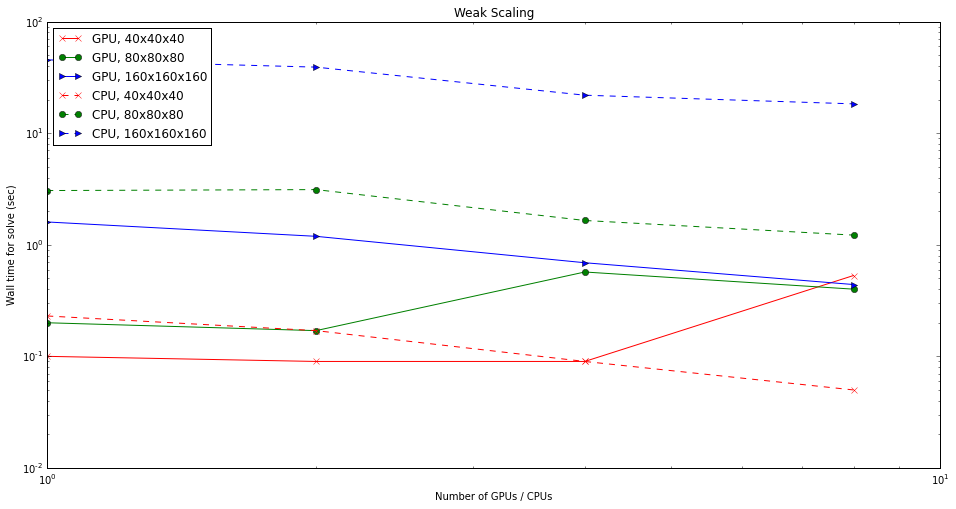

In [41]:
N_1GPU = numpy.array([1000, 8000, 64000, 512000, 4096000])
Time_1GPU = numpy.array([0.024, 0.017, 0.10, 0.2, 1.6])
err_1GPU = numpy.array([0., 0., 0., 0., 0.])

N_2GPU = numpy.array([1000, 8000, 64000, 512000, 4096000])
Time_2GPU = numpy.array([0.04, 0.11, 0.09, 0.17, 1.19])
err_2GPU = numpy.array([0., 0., 0., 0., 0.])

N_4GPU = numpy.array([1000, 8000, 64000, 512000, 4096000])
Time_4GPU = numpy.array([0.11, 0.10, 0.09, 0.57, 0.69])
err_4GPU = numpy.array([0., 0., 0., 0., 0.])

N_8GPU = numpy.array([1000, 8000, 64000, 512000, 4096000])
Time_8GPU = numpy.array([0.09, 0.09, 0.53, 0.4, 0.44])
err_8GPU = numpy.array([0., 0., 0., 0., 0.])

nGPU = numpy.array([1, 2, 4, 8])
Time_N1K_GPU = numpy.array([0.024, 0.04, 0.11, 0.09])
Time_N8K_GPU = numpy.array([0.017, 0.11, 0.10, 0.09])
Time_N64K_GPU = numpy.array([0.10, 0.09, 0.09, 0.53])
Time_N512K_GPU = numpy.array([0.2, 0.17, 0.57, 0.4])
Time_N4M_GPU = numpy.array([1.6, 1.19, 0.69, 0.44])

N_1CPU = numpy.array([64000, 512000, 4096000])
Time_1CPU = numpy.array([0.23, 3.06, 45.37])
err_1CPU = numpy.array([0., 0., 0.])

N_2CPU = numpy.array([64000, 512000, 4096000])
Time_2CPU = numpy.array([0.17, 3.12, 39.05])
err_2CPU = numpy.array([0., 0., 0.])

N_4CPU = numpy.array([64000, 512000, 4096000])
Time_4CPU = numpy.array([0.09, 1.65, 21.88])
err_4CPU = numpy.array([0., 0., 0.])

N_8CPU = numpy.array([64000, 512000, 4096000])
Time_8CPU = numpy.array([0.05, 1.22, 18.3])
err_8CPU = numpy.array([0., 0., 0.])

nCPU = numpy.array([1, 2, 4, 8])
Time_N64K_CPU = numpy.array([0.23, 0.17, 0.09, 0.05])
Time_N512K_CPU = numpy.array([3.06, 3.12, 1.65, 1.22])
Time_N4M_CPU = numpy.array([45.37, 39.05, 21.88, 18.3])

#pyplot.figure(figsize=(16,8), dpi=400)
#pyplot.subplot(1, 2, 1)
#pyplot.title("Weak Scaling")
#ax = pyplot.gca()
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposx='clip')
#pyplot.errorbar(N_1GPU, Time_1GPU, yerr = err_1GPU, fmt='ks-', label="1 GPU")
#pyplot.errorbar(N_2GPU, Time_2GPU, yerr = err_2GPU, fmt='r^-', label="2 GPU")
#pyplot.errorbar(N_4GPU, Time_4GPU, yerr = err_4GPU, fmt='gx-', label="4 GPU")
#pyplot.errorbar(N_8GPU, Time_8GPU, yerr = err_8GPU, fmt='bo-', label="8 GPU")
#
#pyplot.errorbar(N_1CPU, Time_1CPU, yerr = err_1CPU, fmt='ks--', label="1 CPU")
#pyplot.errorbar(N_2CPU, Time_2CPU, yerr = err_2CPU, fmt='r^--', label="2 CPU")
#pyplot.errorbar(N_4CPU, Time_4CPU, yerr = err_4CPU, fmt='gx--', label="4 CPU")
#pyplot.errorbar(N_8CPU, Time_8CPU, yerr = err_8CPU, fmt='bo--', label="8 CPU")
#pyplot.xlabel("Number of total grid points")
#pyplot.ylabel("Wall time for solve (sec)")
#pyplot.legend(loc=0)

pyplot.figure(figsize=(16,8), dpi=400)

pyplot.title("Weak Scaling")
ax = pyplot.gca()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
#pyplot.plot(nGPU, Time_N1K_GPU, 'ks-', label="GPU, 10x10x10")
#pyplot.plot(nGPU, Time_N8K_GPU, 'r^-', label="GPU, 20x20x20")
pyplot.plot(nGPU, Time_N64K_GPU, 'rx-', label="GPU, 40x40x40")
pyplot.plot(nGPU, Time_N512K_GPU, 'go-', label="GPU, 80x80x80")
pyplot.plot(nGPU, Time_N4M_GPU, 'b>-', label="GPU, 160x160x160")

pyplot.plot(nCPU, Time_N64K_CPU, 'rx--', label="CPU, 40x40x40")
pyplot.plot(nCPU, Time_N512K_CPU, 'go--', label="CPU, 80x80x80")
pyplot.plot(nCPU, Time_N4M_CPU, 'b>--', label="CPU, 160x160x160")
pyplot.xlabel("Number of GPUs / CPUs")
pyplot.ylabel("Wall time for solve (sec)")
#pyplot.ylim(0, 4)
pyplot.legend(loc=0)

## Strong Scaling Test

<font color='red'>Number of GPU: 1, 2, 4, 8, 16, 32 (K20m)</font>  
Machine: ivygpu-noecc  
Top solver: Preconditioned CG (PCG)  
Tolerance: absolute residual reach $10^{-8}$

Preconditioner: AMG  

AMG algorithm: Classical  
Selector: PMIS  
Interpolation: D2  
Strength: AHAT  

Smoother: Block Jocabi  
Coarsest solver: Gauss-Seidel
Cycle: V  
Pre-sweep: 1  
Post-Sweep: 1  
Coarsest sweep: 4
Maximum size of coarsest grid: 2  
Relaxation factor of the block Jacobi: 0.8  

<font color='red'>Grid size: 200x200x100, 200x200x200</font>

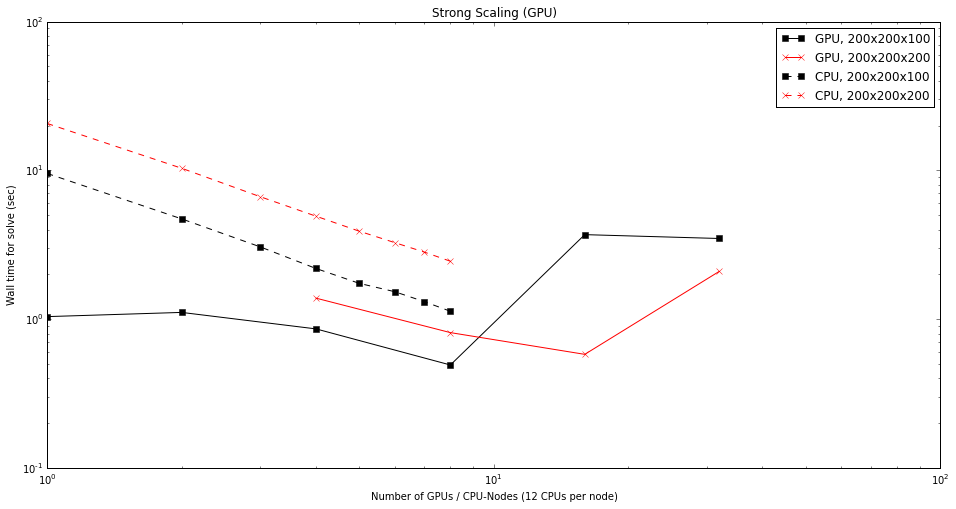

In [26]:
N_4M_GPU = numpy.array([1, 2, 4, 8, 16, 32])
Time_4M_GPU_Raw = numpy.array([[1.04, 1.11, 0.86, 0.5, 3.7, 3.49],
                               [1.04, 1.11, 0.86, 0.49, 3.72, 3.47],
                               [1.04, 1.11, 0.86, 0.49, 3.69, 3.51],
                               [1.04, 1.11, 0.86, 0.49, 3.69, 3.47],
                               [1.04, 1.11, 0.86, 0.49, 3.69, 3.48]])
Time_4M_GPU = numpy.average(Time_4M_GPU_Raw, axis=0)

N_8M_GPU = numpy.array([4, 8, 16, 32])
Time_8M_GPU_Raw = numpy.array([[1.37, 0.81, 0.57, 2.1],
                               [1.44, 0.81, 0.58, 2.09],
                               [1.37, 0.81, 0.58, 2.09],
                               [1.37, 0.82, 0.58, 2.09],
                               [1.37, 0.81, 0.59, 2.09]])
Time_8M_GPU = numpy.average(Time_8M_GPU_Raw, axis=0)

N_4M_CPU = numpy.array([1, 2, 3, 4, 5, 6, 7, 8])
Time_4M_CPU = numpy.array([9.53, 4.72, 3.06, 2.19, 1.74, 1.53, 1.31, 1.13])

N_8M_CPU = numpy.array([1, 2, 3, 4, 5, 6, 7, 8])
Time_8M_CPU = numpy.array([20.65, 10.33, 6.65, 4.92, 3.9, 3.27, 2.82, 2.45])


pyplot.figure(figsize=(16,8), dpi=400)
pyplot.title("Strong Scaling (GPU)")
ax = pyplot.gca()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
pyplot.plot(N_4M_GPU, Time_4M_GPU, 'ks-', label="GPU, 200x200x100")
pyplot.plot(N_8M_GPU, Time_8M_GPU, 'rx-', label="GPU, 200x200x200")
pyplot.plot(N_4M_CPU, Time_4M_CPU, 'ks--', label="CPU, 200x200x100")
pyplot.plot(N_8M_CPU, Time_8M_CPU, 'rx--', label="CPU, 200x200x200")
pyplot.xlabel("Number of GPUs / CPU-Nodes (12 CPUs per node)")
pyplot.ylabel("Wall time for solve (sec)")
pyplot.legend(loc=0)

## Other Tests

16 GPU, Nx = Ny = Nz = 320, Time = 2.6 sec  
40 GPU, Nx = Ny = Nz = 320, Time = 1.5 sec  
40 GPU, Nx = Ny = 640 Nz = 100, Time = 1.19 sec   
40 GPU, Nx = 1280 Ny = 640 Nz = 200, Time = 6.36 sec  